In [ ]:
! pip install albumentations==0.4.6

     |████████████████████████████████| 122kB 5.3MB/s 
     |████████████████████████████████| 952kB 12.1MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=65165 sha256=507eb0307c98f05c558d2b0d2e30b18b350a30de420c6a463609428d485545d8
  Stored in directory: /root/.cache/pip/wheels/c7/f4/89/56d1bee5c421c36c1a951eeb4adcc32fbb82f5344c086efa14
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


## Cloning Git Repo

In [ ]:
!git clone "https://github.com/divyam96/TheSchoolOfAI-EVA5-Assignments.git"

Cloning into 'TheSchoolOfAI-EVA5-Assignments'...
remote: Enumerating objects: 217, done.
remote: Counting objects: 100% (217/217), done.
remote: Compressing objects: 100% (179/179), done.
remote: Total 426 (delta 106), reused 67 (delta 20), pack-reused 209
Receiving objects: 100% (426/426), 9.95 MiB | 22.74 MiB/s, done.
Resolving deltas: 100% (162/162), done.


In [ ]:
%cd "TheSchoolOfAI-EVA5-Assignments/Assignment 9/src"

/content/TheSchoolOfAI-EVA5-Assignments/Assignment 9/src


## Loading CIFAR-10 Data 

In [ ]:
from data_loader import ImageDataLoader
from data_transform import CIFAR10Transforms
import albumentations as A

In [ ]:
DATA_DIR = 'data'

cifar10 = CIFAR10Transforms()

custom_train_tfms = [ A.RandomCrop(32, 32, p=0.8),
                     A.HorizontalFlip()]
train_transform,  test_transform = cifar10.build_transforms(train_tfms_list=custom_train_tfms, test_tfms_list=[])

image_loader = ImageDataLoader(train_transform, test_transform, DATA_DIR, 128, True, 'CIFAR10', figure_size=(20,10))

Files already downloaded and verified
Files already downloaded and verified


### Taking a look at the data

#### Train data

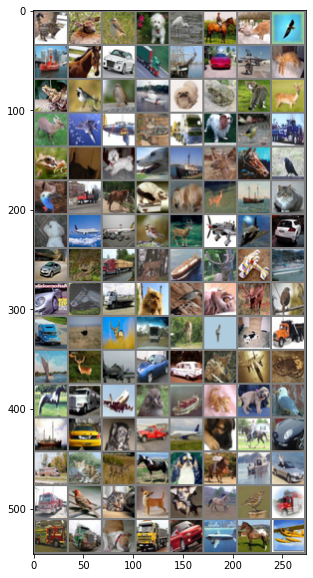

In [ ]:
image_loader.show(dataset_type='train')

#### Test Data

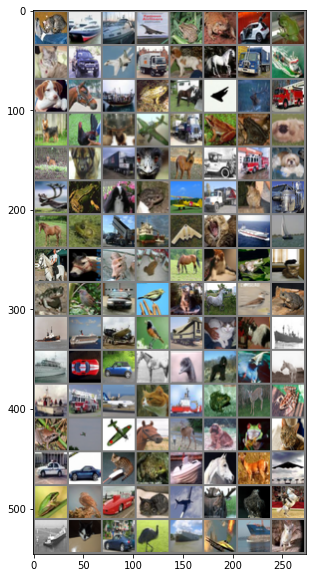

In [ ]:
image_loader.show(dataset_type='test')

## Defining the CNN Learner

Architecture : **(C1|M1|C2|M2|C3|M3|C4|GAP|O)**

Here we are loading our custom Dialated CNN model which has
* 3 Maxpool layers 
* 1 Dialated Convolution Layer
* 1 Depthwise Seperable Convolution Layer





In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from cnn_models import ResNet18
from learner import Learner

In [ ]:
cnn_learner = Learner(train_loader=image_loader.train_loader, test_loader=image_loader.test_loader, model=ResNet18(),loss_func=F.cross_entropy)

### Model Summary

In [ ]:
cnn_learner.summary(input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

## Training

In [ ]:
cnn_learner.fit(epochs=10, lr=0.01, step_size=7)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.9574921727180481 Batch_id=390 Accuracy=53.43: 100%|██████████| 391/391 [00:31<00:00, 12.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0384, Accuracy: 6294/10000 (62.94%)

EPOCH: 1


Loss=0.3849851191043854 Batch_id=390 Accuracy=72.50: 100%|██████████| 391/391 [00:30<00:00, 12.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8100, Accuracy: 7333/10000 (73.33%)

EPOCH: 2


Loss=0.5942502021789551 Batch_id=390 Accuracy=80.13: 100%|██████████| 391/391 [00:31<00:00, 12.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6724, Accuracy: 7699/10000 (76.99%)

EPOCH: 3


Loss=0.4677715301513672 Batch_id=390 Accuracy=84.07: 100%|██████████| 391/391 [00:31<00:00, 12.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8686, Accuracy: 7429/10000 (74.29%)

EPOCH: 4


Loss=0.34763795137405396 Batch_id=390 Accuracy=87.24: 100%|██████████| 391/391 [00:31<00:00, 12.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5917, Accuracy: 8076/10000 (80.76%)

EPOCH: 5


Loss=0.41592031717300415 Batch_id=390 Accuracy=89.13: 100%|██████████| 391/391 [00:30<00:00, 12.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6000, Accuracy: 8038/10000 (80.38%)

EPOCH: 6


Loss=0.26582014560699463 Batch_id=390 Accuracy=91.27: 100%|██████████| 391/391 [00:30<00:00, 12.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6812, Accuracy: 8050/10000 (80.50%)

EPOCH: 7


Loss=0.190567284822464 Batch_id=390 Accuracy=96.15: 100%|██████████| 391/391 [00:31<00:00, 12.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3979, Accuracy: 8716/10000 (87.16%)

EPOCH: 8


Loss=0.0380006805062294 Batch_id=390 Accuracy=97.40: 100%|██████████| 391/391 [00:30<00:00, 12.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4033, Accuracy: 8706/10000 (87.06%)

EPOCH: 9


Loss=0.033194467425346375 Batch_id=390 Accuracy=97.97: 100%|██████████| 391/391 [00:31<00:00, 12.59it/s]



Test set: Average loss: 0.4051, Accuracy: 8724/10000 (87.24%)



#### Plot Losses and Accuracy(Train and Test)

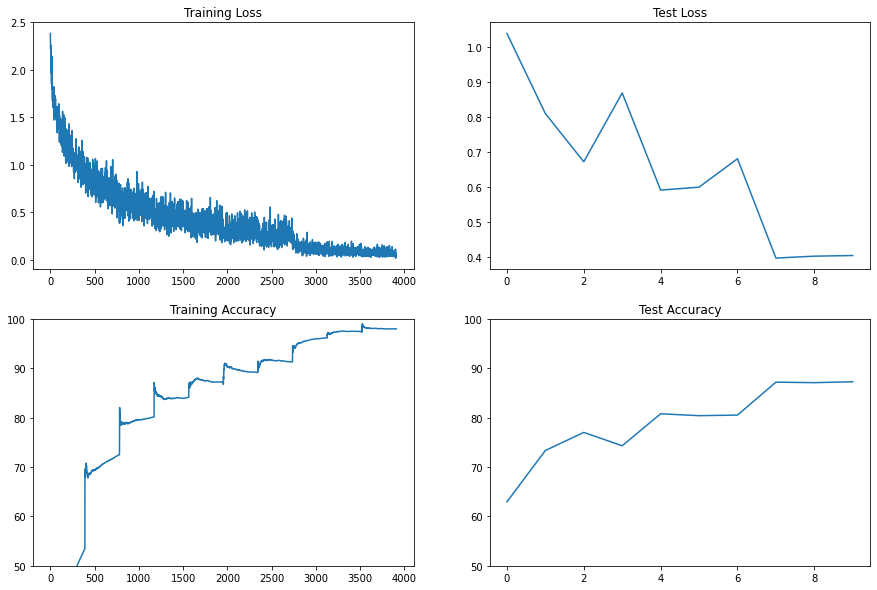

In [ ]:
cnn_learner.plot_losses()

## Interpreting the Learner on Test Data

In [ ]:
from interpreter import Interpreter

In [ ]:
intrepret = Interpreter(model=cnn_learner.model, dataloader=image_loader.test_loader, classes=image_loader.classes)

/content/TheSchoolOfAI-EVA5-Assignments/Assignment 9/src/interpreter.py:38: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idxs_mask = ((predicted == labels) == False).nonzero()


#### Confusion Matrix

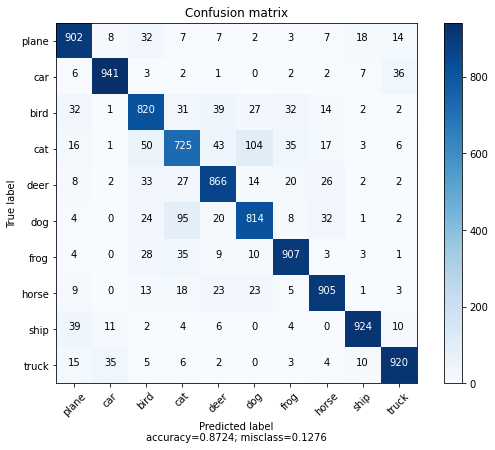

In [ ]:
intrepret.plot_confusion_matrix()

#### Performance Metrics
Here we see the Precision, Recall, F1-Score

In [ ]:
intrepret.show_classification_report()

,precision,recall,f1-score,support
plane,0.811881,0.8200,0.815920,1000.0000
car,0.941942,0.9410,0.941471,1000.0000
bird,0.763158,0.7250,0.743590,1000.0000
cat,0.852362,0.8660,0.859127,1000.0000
deer,0.818913,0.8140,0.816449,1000.0000
dog,0.890088,0.9070,0.898465,1000.0000
frog,0.896040,0.9050,0.900498,1000.0000
horse,0.871498,0.9020,0.886486,1000.0000
ship,0.951596,0.9240,0.937595,1000.0000
truck,0.923695,0.9200,0.921844,1000.0000


#### Misclassifications
Visualizing 50 Misclassifications


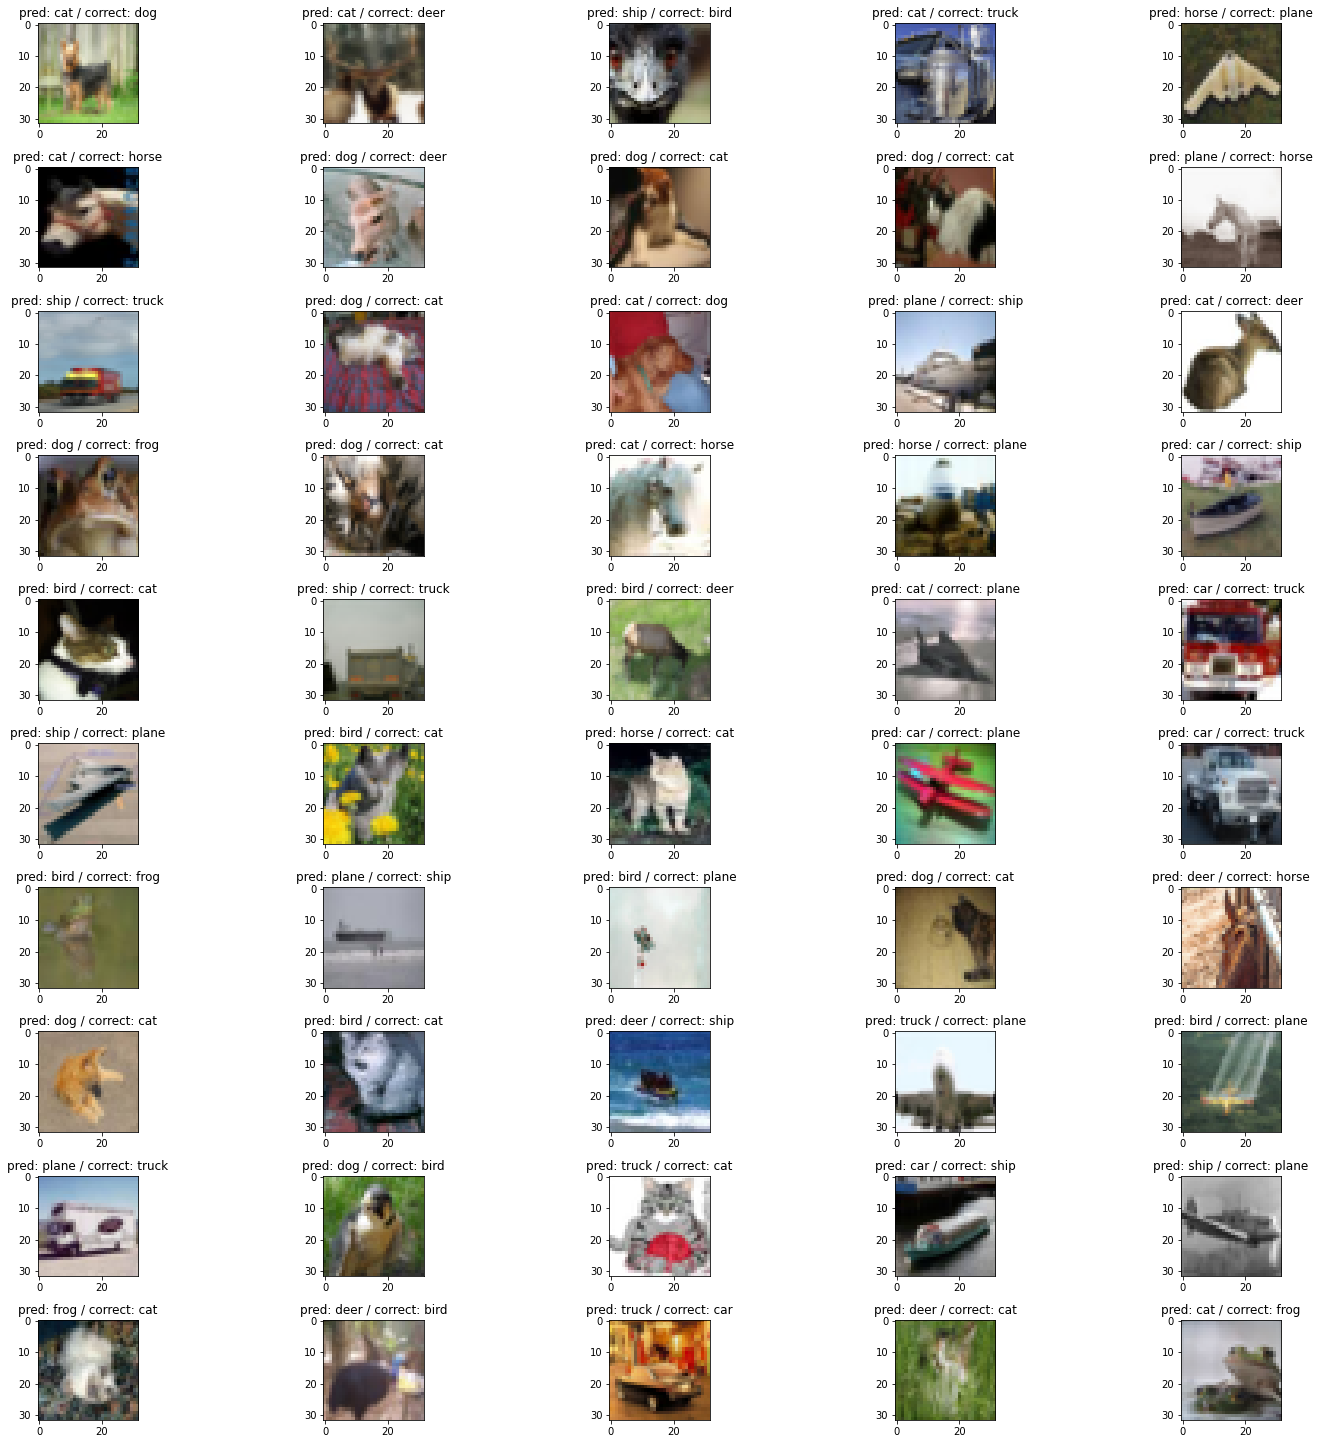

In [ ]:
intrepret.show_misclassifications(k=50)

## GrandCam

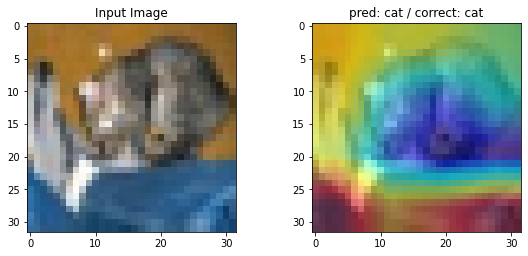

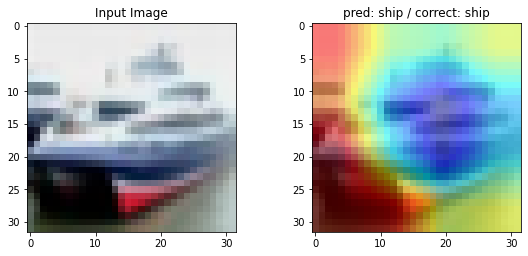

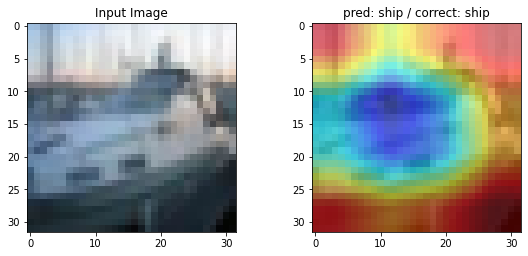

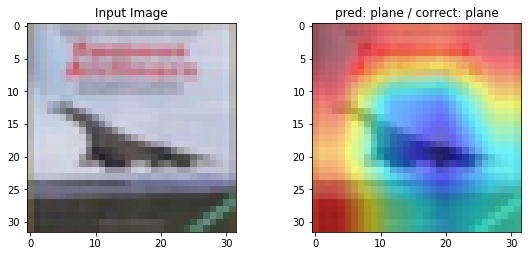

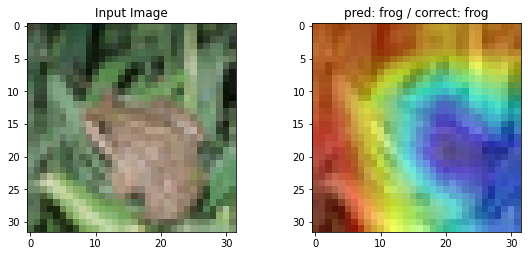

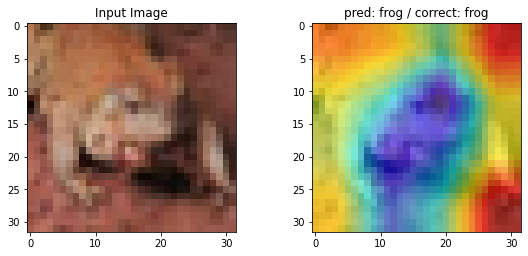

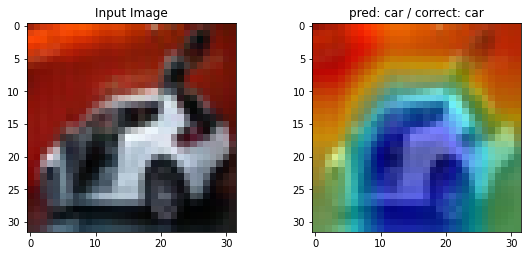

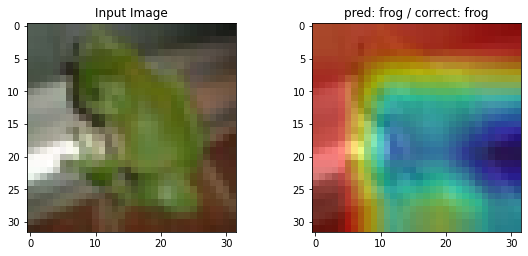

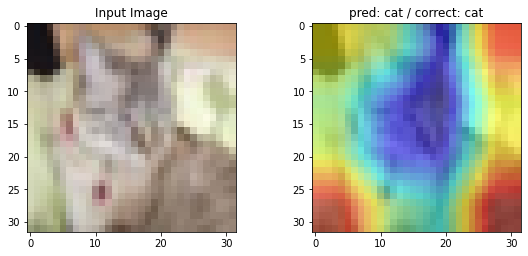

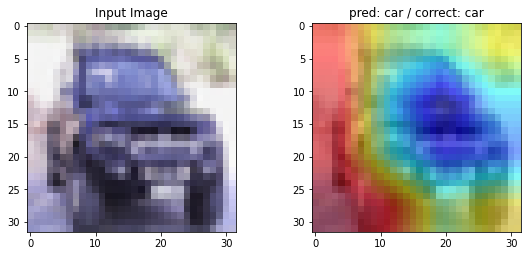

In [ ]:
from gradcam import GradCam
img_tensor_batch, labels = next(iter(image_loader.test_loader))
for idx in range(10):
  gm = GradCam(model=cnn_learner.model, img_tensor=img_tensor_batch[idx],
              correct_class=labels[idx], classes=image_loader.classes,
              feature_module=cnn_learner.model.layer4, target_layer_names=['1'])
  gm.plot()